In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


Spot Prices Section

C:\Users\ngt13\AppData\Local\Temp\ipykernel_6412\3505211509.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df_solar.rename(columns={country: f"{country}_SWGDN_no_pop_weights_1979_2020_hourly.dat"}, inplace=True)
C:\Users\ngt13\AppData\Local\Temp\ipykernel_6412\3505211509.py:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df_wind.rename(columns={country: f"ERA5_native_grid_{country}_whh_weighted_1979_2019_v16_hourly.dat"}, inplace=True)
C:\Users\ngt13\AppData\Local\Temp\ipykernel_6412\3505211509.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

S

Dataframes successfully filtered.


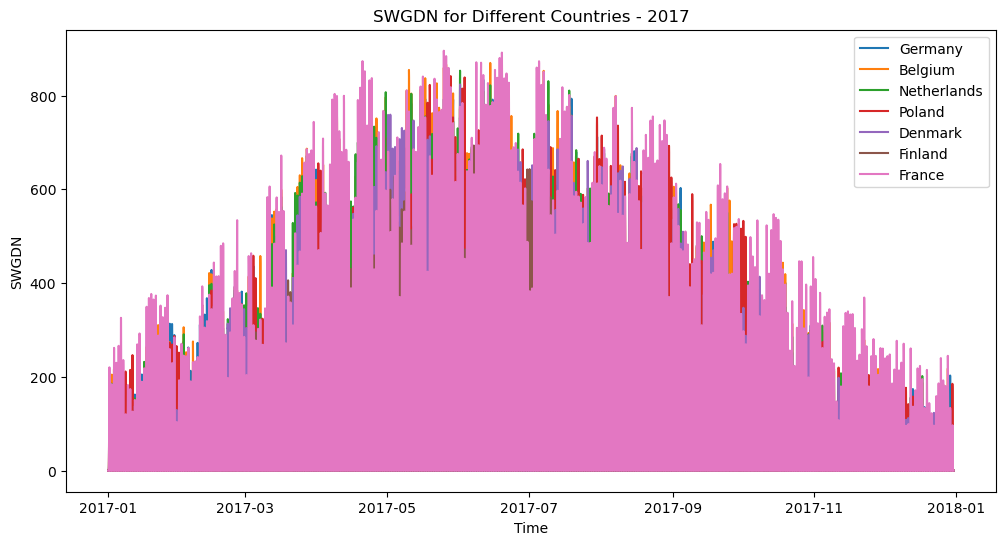

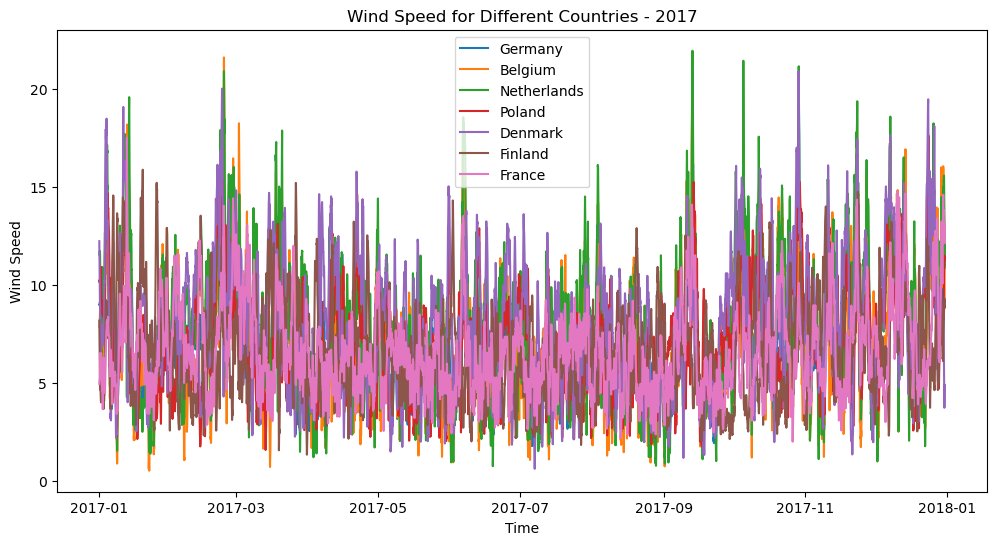

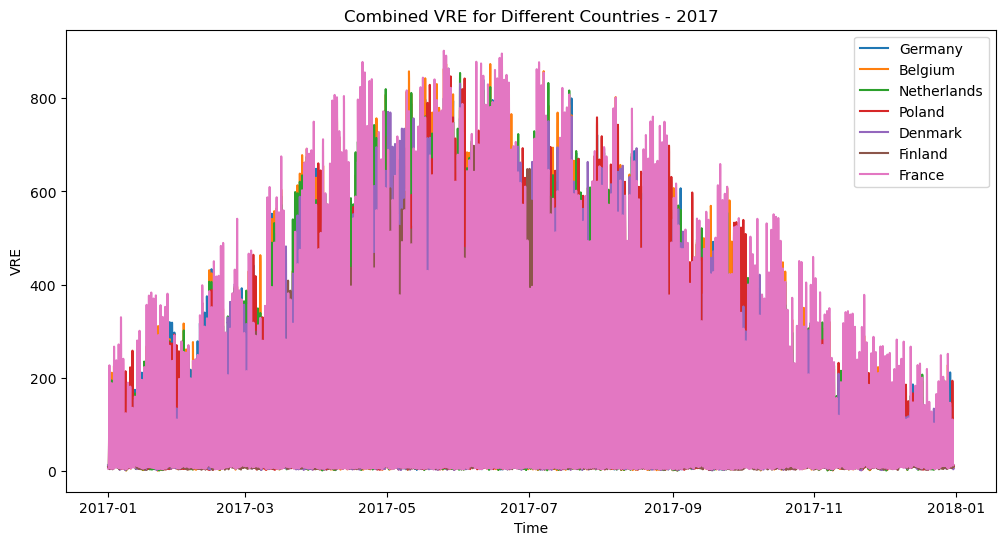

In [2]:
country_VRE = ['Germany', 'Belgium', 'Netherlands', 'Poland', 'Denmark', 'Finland', 'France']

solar_columns = [f'{country}_SWGDN_no_pop_weights_1979_2020_hourly.dat' for country in country_VRE]
solar_columns.insert(0, "time")  # Insert "time" column at the beginning

wind_columns = [f'ERA5_native_grid_{country}_whh_weighted_1979_2019_v16_hourly.dat' for country in country_VRE]
wind_columns.insert(0, "time")  # Insert "time" column at the beginning

df_solar = pd.read_csv("ERA5_SWGDN_all_countries_1979_2019_hourly.csv", usecols=solar_columns)
df_wind = pd.read_csv("ERA5_whh_all_countries_1979_2019_inclusive_hourly.csv", usecols=wind_columns)

df_solar["time"] = pd.to_datetime(df_solar["time"], format='%Y-%m-%d %H:%M:%S')
df_wind["time"] = pd.to_datetime(df_wind["time"], format='%Y-%m-%d %H:%M:%S')
sel_year = 2017

def filter_year_vre(df, year, country):
    start_date = pd.to_datetime(f'{year}-01-01')
    end_date = pd.to_datetime(f'{year}-12-31')
    filtered_df = df.loc[(df['time'] >= start_date) & (df['time'] <= end_date)]
    return filtered_df

filtered_dfs_solar = []
filtered_dfs_wind = []

for country in country_VRE:
    filtered_df_solar = filter_year_vre(df_solar, sel_year, f"{country}_SWGDN_no_pop_weights_1979_2020_hourly.dat")
    filtered_df_wind = filter_year_vre(df_wind, sel_year, f"ERA5_native_grid_{country}_whh_weighted_1979_2019_v16_hourly.dat")
    
    filtered_df_solar.rename(columns={country: f"{country}_SWGDN_no_pop_weights_1979_2020_hourly.dat"}, inplace=True)
    filtered_df_wind.rename(columns={country: f"ERA5_native_grid_{country}_whh_weighted_1979_2019_v16_hourly.dat"}, inplace=True)
    
    filtered_dfs_solar.append(filtered_df_solar)
    filtered_dfs_wind.append(filtered_df_wind)

if all(df.empty for df in filtered_dfs_solar) or all(df.empty for df in filtered_dfs_wind):
    print("No data available for the selected year.")
else:
    print("Dataframes successfully filtered.")

# # Combine the filtered solar and wind dataframes
# df_VRE = filtered_dfs_solar[0].copy()
# for i, country in enumerate(country_VRE):
#     df_VRE[country] = filtered_dfs_solar[i][f"{country}_SWGDN_no_pop_weights_1979_2020_hourly.dat"] + filtered_dfs_wind[i][f"ERA5_native_grid_{country}_whh_weighted_1979_2019_v16_hourly.dat"]

# # Create the filtered_df_VRE DataFrame by adding corresponding columns from filtered_dfs_solar and filtered_dfs_wind
# filtered_df_VRE = pd.DataFrame()
# for i in range(len(country_VRE)):
#     country = country_VRE[i]
#     filtered_df_VRE[country] = filtered_dfs_solar[i][f"{country}_SWGDN_no_pop_weights_1979_2020_hourly.dat"] + filtered_dfs_wind[i][f"ERA5_native_grid_{country}_whh_weighted_1979_2019_v16_hourly.dat"]

# Create the filtered_df_VRE DataFrame by adding corresponding columns from filtered_dfs_solar and filtered_dfs_wind
filtered_df_VRE = pd.DataFrame()
filtered_df_VRE["time"] = filtered_dfs_solar[0]["time"]  # Use the time column from any of the filtered DataFrames
for i in range(len(country_VRE)):
    country = country_VRE[i]
    filtered_df_VRE[country] = filtered_dfs_solar[i][f"{country}_SWGDN_no_pop_weights_1979_2020_hourly.dat"] + filtered_dfs_wind[i][f"ERA5_native_grid_{country}_whh_weighted_1979_2019_v16_hourly.dat"]

# Plotting the filtered solar data
plt.figure(figsize=(12, 6))
for country, df_solar in zip(country_VRE, filtered_dfs_solar):
    plt.plot(df_solar["time"], df_solar[f"{country}_SWGDN_no_pop_weights_1979_2020_hourly.dat"], label=country)

plt.xlabel('Time')
plt.ylabel('SWGDN')
plt.title(f'SWGDN for Different Countries - {sel_year}')
plt.legend()
plt.show()

# Plotting the filtered wind data
plt.figure(figsize=(12, 6))
for country, df_wind in zip(country_VRE, filtered_dfs_wind):
    plt.plot(df_wind["time"], df_wind[f"ERA5_native_grid_{country}_whh_weighted_1979_2019_v16_hourly.dat"], label=country)

plt.xlabel('Time')
plt.ylabel('Wind Speed')
plt.title(f'Wind Speed for Different Countries - {sel_year}')
plt.legend()
plt.show()

# Plotting the combined VRE data
plt.figure(figsize=(12, 6))
for country in country_VRE:
    plt.plot(filtered_df_VRE["time"], filtered_df_VRE[country], label=country)

plt.xlabel('Time')
plt.ylabel('VRE')
plt.title(f'Combined VRE for Different Countries - {sel_year}')
plt.legend()
plt.show()

C:\Users\ngt13\AppData\Local\Temp\ipykernel_6412\3117377467.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.loc[:, "Day Ahead Auction"] = pd.to_numeric(df["Day Ahead Auction"], errors="coerce")


Highest value in DE: 871.0 at index 5779
Lowest value in DE: -19.04 at index 1886
Highest value in PL: 771.0 at index 5636
Lowest value in PL: 16.33 at index 8622
Highest value in NL: 871.0 at index 5779
Lowest value in NL: -222.36 at index 2700
Highest value in BE: 871.0 at index 5779
Lowest value in BE: -100.0 at index 2725
Highest value in DK2: 871.0 at index 5779
Lowest value in DK2: -0.1 at index 4718
Highest value in FIN: 861.14 at index 5265
Lowest value in FIN: -2.08 at index 7565
Highest value in FR: 2987.78 at index 2240
Lowest value in FR: -1.44 at index 8692


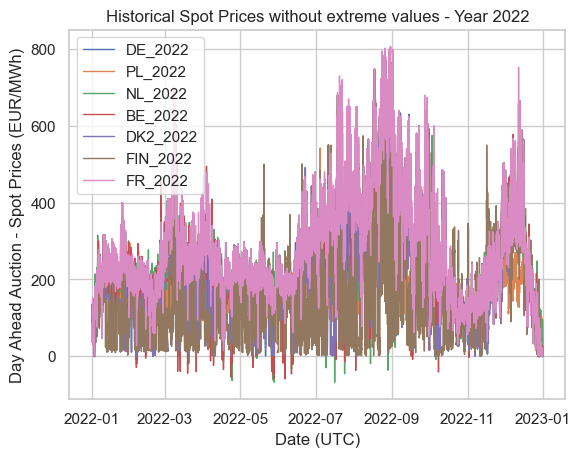

In [15]:
def filter_year(df, year):
    filtered_df = df[df["Date (UTC)"].dt.year == year]
    return filtered_df

sel_year = 2022
sheet_names = [f"DE_{sel_year}", f"PL_{sel_year}", f"NL_{sel_year}", f"BE_{sel_year}", f"DK2_{sel_year}", f"FIN_{sel_year}", f"FR_{sel_year}"]
columns_to_use = ["Date (GMT+1)", "Day Ahead Auction", "Load"]
dict = {}

filename = "Demand_Renewable_Share_Loc_6.xlsx"

# Iteration
for sheet_name in sheet_names:
    df = pd.read_excel(filename, sheet_name=sheet_name, usecols=columns_to_use)
    df["Date (GMT+1)"] = pd.to_datetime(df["Date (GMT+1)"])
    df["Date (UTC)"] = df["Date (GMT+1)"] - pd.Timedelta(hours=1)
    df.drop("Date (GMT+1)", axis=1, inplace=True)
    dict[sheet_name] = df

# Filter dict for the selected year
filtered_dict = {sheet_name: filter_year(df, sel_year) for sheet_name, df in dict.items()}

# SPOT PRICE
for sheet_name, df in filtered_dict.items():
    
    df.loc[:, "Day Ahead Auction"] = pd.to_numeric(df["Day Ahead Auction"], errors="coerce")
    max_value = df["Day Ahead Auction"].max()
    max_index = df["Day Ahead Auction"].idxmax()
    country_with_highest = sheet_name.split('_')[0]  
    min_value = df["Day Ahead Auction"].min()
    min_index = df["Day Ahead Auction"].idxmin()
    country_with_lowest = sheet_name.split('_')[0]  
    
    print(f"Highest value in {country_with_highest}: {max_value} at index {max_index}")
    print(f"Lowest value in {country_with_lowest}: {min_value} at index {min_index}")
    # # Exclude max and min values
    # filtered_df = df[(df["Day Ahead Auction"] != max_value) & (df["Day Ahead Auction"] != min_value)]
    
    # plt.plot(filtered_df["Date (UTC)"], filtered_df["Day Ahead Auction"], label=str(sheet_name), linewidth=1)
    # plt.plot(df["Date (UTC)"], df["Day Ahead Auction"], label=str(sheet_name), linewidth=1)
    # Exclude highest 15 and lowest 15 values
    sorted_values = df["Day Ahead Auction"].sort_values()
    filtered_df = df[~df["Day Ahead Auction"].isin(sorted_values[:15]) & ~df["Day Ahead Auction"].isin(sorted_values[-15:])]
    
    plt.plot(filtered_df["Date (UTC)"], filtered_df["Day Ahead Auction"], label=str(sheet_name), linewidth=1)


plt.xlabel('Date (UTC)')
plt.ylabel('Day Ahead Auction - Spot Prices (EUR/MWh)')
# plt.title(f'Historical Spot Prices - Year {sel_year}')
plt.title(f'Historical Spot Prices without extreme values - Year {sel_year}')
plt.legend()
plt.show()


In [19]:

# Definir las hojas de Excel y las columnas a extraer
sheets_to_read = ['2025', '2035', '2045']
columns_to_extract = ['Time (UTC)', 'BE', 'NL', 'FR', 'PL', 'FIN', 'DK2', 'DE4-S', 'DE4-N', 'DE4-W']

# Nombre de los archivos de Excel
file_names = ['R1.xlsx', 'R4.xlsx', 'R19.xlsx']

# Diccionario para almacenar los DataFrames
dataframes = {}

# Leer los archivos de Excel y guardar los datos en DataFrames
for file_name in file_names:
    # Leer el archivo de Excel
    df = pd.read_excel(file_name, sheet_name=None)
    
    # Crear un diccionario para almacenar los DataFrames por hoja
    df_dict = {}
    
    # Leer las hojas de Excel y extraer las columnas necesarias
    for sheet_name in sheets_to_read:
        df_sheet = df[sheet_name][columns_to_extract]
        df_dict[sheet_name] = df_sheet
    
    # Agregar el diccionario de DataFrames al diccionario principal
    dataframes[file_name] = df_dict

# Acceder a los DataFrames según el archivo y la hoja
for file_name, df_dict in dataframes.items():
    print(f"Data for {file_name}:")
    for sheet_name, df_sheet in df_dict.items():
        df_name = f"df_{file_name.split('.')[0]}_{sheet_name}"
        globals()[df_name] = df_sheet  # Guardar el DataFrame en una variable con nombre dinámico
        print(f"{df_name}:")
        print(df_sheet)
        print('\n')

Data for R1.xlsx:
df_R1_2025:
              Time (UTC)      BE      NL      FR      PL     FIN     DK2  \
0    2012-01-02 00:00:00  33.821  34.280  32.685  26.673  30.639  31.558   
1    2012-01-02 01:00:00  33.821  34.280  32.685  26.673  30.639  31.558   
2    2012-01-02 02:00:00  33.821  34.280  32.685  26.673  30.639  31.558   
3    2012-01-02 03:00:00  33.821  34.280  32.685  26.673  30.639  31.558   
4    2012-01-02 04:00:00  33.821  34.280  32.685  26.673  32.661  31.558   
...                  ...     ...     ...     ...     ...     ...     ...   
8731 2012-12-30 19:00:00  36.327  36.464  37.591  24.826  37.340  34.992   
8732 2012-12-30 20:00:00  35.528  35.233  35.839  24.826  35.426  33.135   
8733 2012-12-30 21:00:00  34.432  33.971  35.362  24.195  33.555  32.290   
8734 2012-12-30 22:00:00  33.656  33.206  34.468  23.936  32.533  30.990   
8735 2012-12-30 23:00:00  33.127  32.684  33.417  23.936  31.586  29.739   

       DE4-S   DE4-N   DE4-W  
0     33.559  32.141  32.7

DataFrames creados:


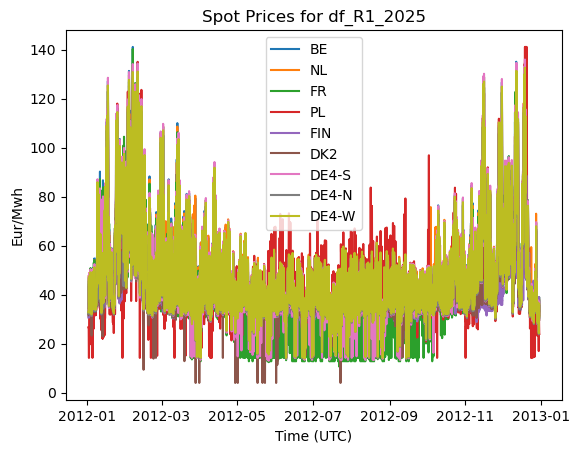

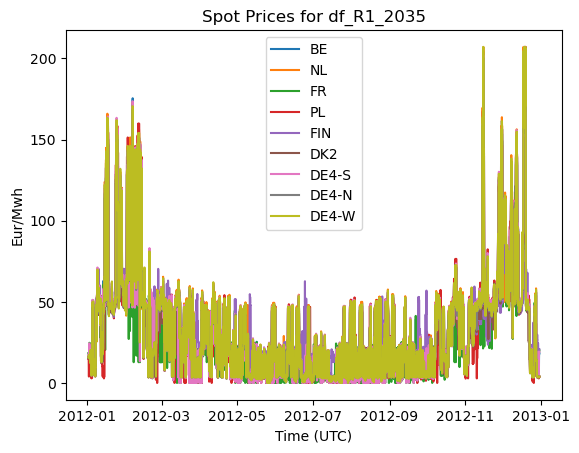

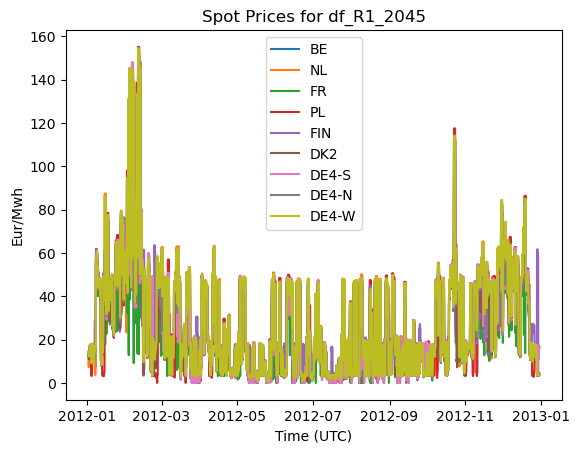

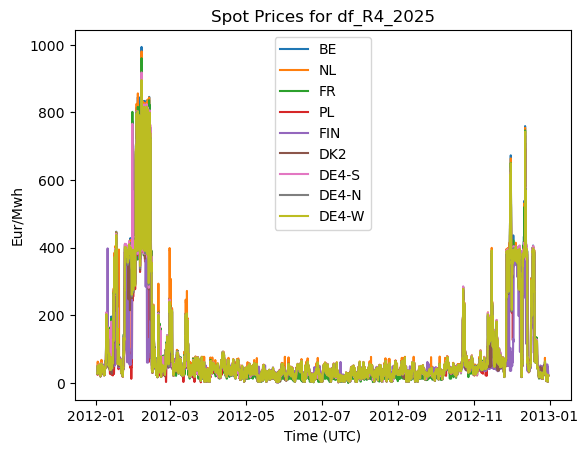

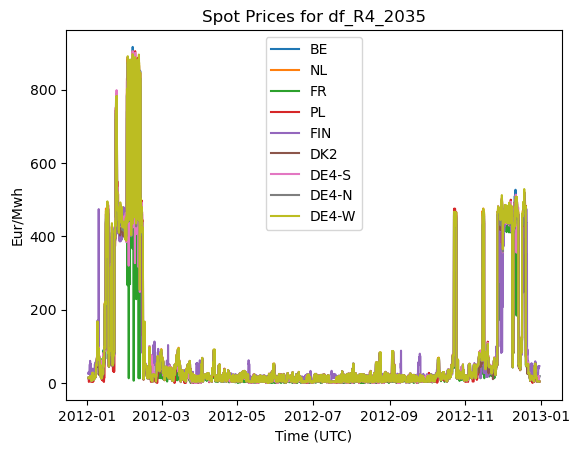

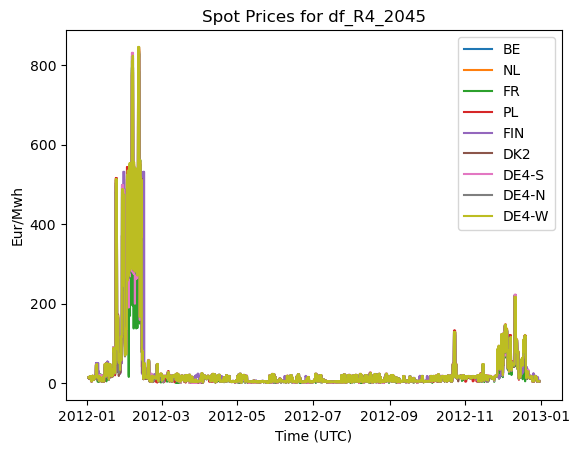

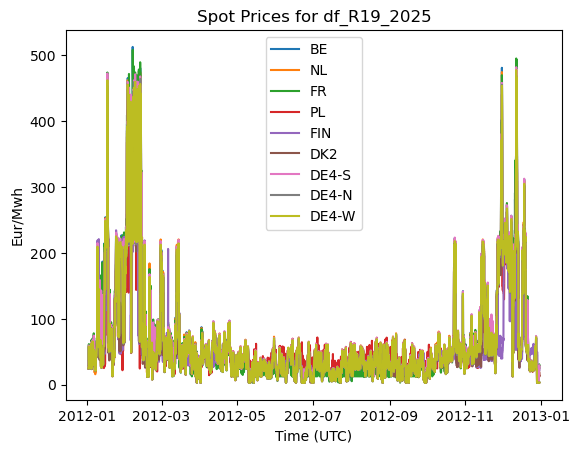

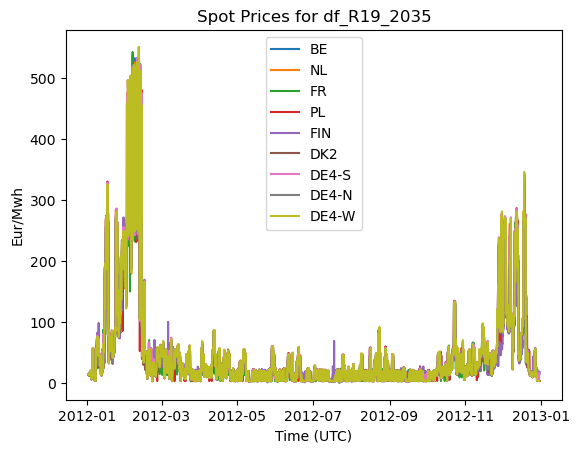

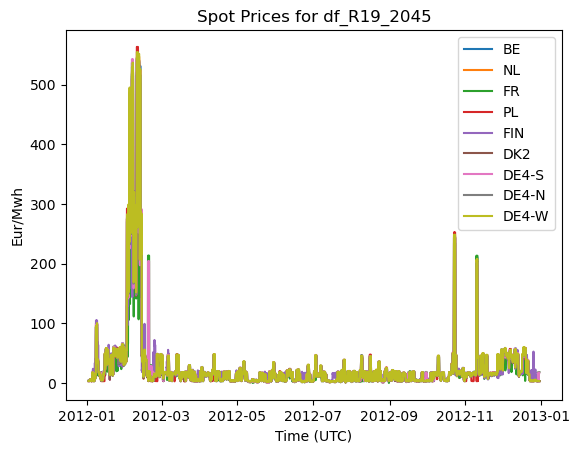

In [12]:
import pandas as pd

# Definir las hojas de Excel y las columnas a extraer
sheets_to_read = ['2025', '2035', '2045']
columns_to_extract = ['Time (UTC)', 'BE', 'NL', 'FR', 'PL', 'FIN', 'DK2', 'DE4-S', 'DE4-N', 'DE4-W']

# Nombre de los archivos de Excel
file_names = ['R1.xlsx', 'R4.xlsx', 'R19.xlsx']

# Diccionario para almacenar los DataFrames
dataframes = {}

# Leer los archivos de Excel y guardar los datos en DataFrames
for file_name in file_names:
    # Leer el archivo de Excel
    df = pd.read_excel(file_name, sheet_name=None)
    
    # Crear un diccionario para almacenar los DataFrames por hoja
    df_dict = {}
    
    # Leer las hojas de Excel y extraer las columnas necesarias
    for sheet_name in sheets_to_read:
        df_sheet = df[sheet_name][columns_to_extract]
        df_dict[sheet_name] = df_sheet
    
    # Agregar el diccionario de DataFrames al diccionario principal
    dataframes[file_name] = df_dict

# Acceder a los DataFrames según el archivo y la hoja
for file_name, df_dict in dataframes.items():
    for sheet_name, df_sheet in df_dict.items():
        df_name = f"df_{file_name.split('.')[0]}_{sheet_name}"
        globals()[df_name] = df_sheet  # Guardar el DataFrame en una variable con nombre dinámico

# Imprimir los nombres de los DataFrames creados
print("DataFrames creados:")
for file_name in file_names:
    for sheet_name in sheets_to_read:
        df_name = f"df_{file_name.split('.')[0]}_{sheet_name}"
        df = globals()[df_name]  # Obtener el DataFrame
        
        plt.plot(df['Time (UTC)'], df['BE'], label='BE')
        plt.plot(df['Time (UTC)'], df['NL'], label='NL')
        plt.plot(df['Time (UTC)'], df['FR'], label='FR')
        plt.plot(df['Time (UTC)'], df['PL'], label='PL')
        plt.plot(df['Time (UTC)'], df['FIN'], label='FIN')
        plt.plot(df['Time (UTC)'], df['DK2'], label='DK2')
        plt.plot(df['Time (UTC)'], df['DE4-S'], label='DE4-S')
        plt.plot(df['Time (UTC)'], df['DE4-N'], label='DE4-N')
        plt.plot(df['Time (UTC)'], df['DE4-W'], label='DE4-W')
        
        plt.xlabel('Time (UTC)')
        plt.ylabel('Eur/Mwh')
        plt.title(f'Spot Prices for {df_name}')
        plt.legend()
        plt.show()



Total Power Output

In [47]:
# P.csv file for total revenue calucaltion LIFETIME
# time,LOC_1,LOC_2,LOC_3,LOC_4.1,LOC_5.1,LOC_6,LOC_7,LOC_8.1,LOC_9,LOC_10
# df_P_100= pd.read_csv("P_w_100.csv")
# df_P_100['time'] = pd.to_datetime(df_P_100['time'], utc=True) 
# df_P_100_stats = pd.read_csv("P_stats_w_100.csv")
# # time,LOC_1,LOC_2,LOC_3,LOC_4.1,LOC_5.1,LOC_6,LOC_7,LOC_8.1,LOC_9,LOC_10
# df_P_150= pd.read_csv("P_w_150.csv")
# df_P_150['time'] = pd.to_datetime(df_P_150['time'], utc=True) 
# df_P_150_stats = pd.read_csv("P_stats_w_150.csv")
# # time,LOC_1,LOC_2,LOC_3,LOC_4.2,LOC_5.2,LOC_6,LOC_7,LOC_8.2,LOC_9,LOC_10
# df_P_PV= pd.read_csv("P_PV.csv")
# df_P_PV['time'] = pd.to_datetime(df_P_PV['time'], utc=True) 
# df_P_PV_stats = pd.read_csv("P_PV_stats.csv")

# # power generation for 50 MW plants:
# # wind:
# arr_w = ['time', 'LOC_1', 'LOC_2', 'LOC_3', 'LOC_4.1', 'LOC_5.1', 'LOC_6', 'LOC_7', 'LOC_8.1', 'LOC_9', 'LOC_10']
# # solar
# arr_s = ['time', 'LOC_1', 'LOC_2', 'LOC_3', 'LOC_4.2', 'LOC_5.2', 'LOC_6', 'LOC_7', 'LOC_8.2', 'LOC_9', 'LOC_10']
# # Calculate P_100 for each location
# P_100 = {}
# for loc in arr_w[1:]:
#     P_100[loc] = df_P_100[loc] * 50

# # Calculate P_150 for each location
# P_150 = {}
# for loc in arr_w[1:]:
#     P_150[loc] = df_P_150[loc] * 50
        
# # Access the calculated values
# for loc, values in P_100.items():
#     print(f"P_100_{loc}: {values.sum()}")

# for loc, values in P_150.items():
#     print(f"P_150_{loc}: {values.sum()}")
       
# # Calculate S_PV for each location
# S_PV = {}
# for loc in arr_s[1:]:
#     S_PV[loc] = df_P_PV[loc] * 50

# # Access the calculated values
# for loc, values in S_PV.items():
#     print(f"S_PV_{loc}: {values.sum()}")
    

In [48]:
def output_year(chosen_year):
    # Read the CSV files
    df_P_100 = pd.read_csv("P_w_100.csv")
    df_P_150 = pd.read_csv("P_w_150.csv")
    df_P_PV = pd.read_csv("P_PV.csv")

    # Convert 'time' column to datetime
    df_P_100['time'] = pd.to_datetime(df_P_100['time'], utc=True)
    df_P_150['time'] = pd.to_datetime(df_P_150['time'], utc=True)
    df_P_PV['time'] = pd.to_datetime(df_P_PV['time'], utc=True)

    # Filter data frames based on chosen year
    df_P_100_year = df_P_100[df_P_100['time'].dt.year == chosen_year]
    df_P_150_year = df_P_150[df_P_150['time'].dt.year == chosen_year]
    df_P_PV_year = df_P_PV[df_P_PV['time'].dt.year == chosen_year]

    # Extract the necessary columns for each data frame
    arr_w = ['time', 'LOC_1', 'LOC_2', 'LOC_3', 'LOC_4.1', 'LOC_5.1', 'LOC_6', 'LOC_7', 'LOC_8.1', 'LOC_9', 'LOC_10']
    arr_s = ['time', 'LOC_1', 'LOC_2', 'LOC_3', 'LOC_4.2', 'LOC_5.2', 'LOC_6', 'LOC_7', 'LOC_8.2', 'LOC_9', 'LOC_10']

    df_P_100_year = df_P_100_year[arr_w]
    df_P_150_year = df_P_150_year[arr_w]
    df_P_PV_year = df_P_PV_year[arr_s]

    # Calculate P_100 for each location
    P_100 = {}
    for loc in arr_w[1:]:
        P_100[loc] = df_P_100_year[loc] * 50

    # Calculate P_150 for each location
    P_150 = {}
    for loc in arr_w[1:]:
        P_150[loc] = df_P_150_year[loc] * 50

    # Calculate S_PV for each location
    S_PV = {}
    for loc in arr_s[1:]:
        S_PV[loc] = df_P_PV_year[loc] * 50

    # Print the calculated values
    for loc, values in P_100.items():
        print(f"P_100_{loc}: {values.sum()}")

    for loc, values in P_150.items():
        print(f"P_150_{loc}: {values.sum()}")

    for loc, values in S_PV.items():
        print(f"S_PV_{loc}: {values.sum()}")
        
chosen_year= 2004
output_year(chosen_year)

P_100_LOC_1: 117588.54500000001
P_100_LOC_2: 157982.12000000002
P_100_LOC_3: 124351.76
P_100_LOC_4.1: 145617.915
P_100_LOC_5.1: 195628.44000000003
P_100_LOC_6: 144440.29499999998
P_100_LOC_7: 167295.115
P_100_LOC_8.1: 205531.69
P_100_LOC_9: 48903.200000000004
P_100_LOC_10: 57753.91500000001
P_150_LOC_1: 133369.94
P_150_LOC_2: 201853.07499999998
P_150_LOC_3: 146764.185
P_150_LOC_4.1: 172543.46000000002
P_150_LOC_5.1: 207461.85499999998
P_150_LOC_6: 171228.33000000002
P_150_LOC_7: 199137.26
P_150_LOC_8.1: 225695.21
P_150_LOC_9: 69047.39499999999
P_150_LOC_10: 68542.33
S_PV_LOC_1: 58026.67
S_PV_LOC_2: 54720.42500000001
S_PV_LOC_3: 52353.399999999994
S_PV_LOC_4.2: 53972.285
S_PV_LOC_5.2: 85438.635
S_PV_LOC_6: 54185.075000000004
S_PV_LOC_7: 59201.94000000001
S_PV_LOC_8.2: 85244.485
S_PV_LOC_9: 63368.945
S_PV_LOC_10: 57155.689999999995


P_100_2015_LOC_1: 106897.105
P_100_2015_LOC_2: 165794.35499999998
P_100_2015_LOC_3: 131579.99
P_100_2015_LOC_4.1: 171094.745
P_100_2015_LOC_5.1: 213640.965
P_100_2015_LOC_6: 160292.63999999998
P_100_2015_LOC_7: 190472.63
P_100_2015_LOC_8.1: 227810.315
P_100_2015_LOC_9: 44800.840000000004
P_100_2015_LOC_10: 58519.090000000004
P_150_2015_LOC_1: 123995.115
P_150_2015_LOC_2: 210911.375
P_150_2015_LOC_3: 156452.97999999998
P_150_2015_LOC_4.1: 199825.75499999998
P_150_2015_LOC_5.1: 230883.88
P_150_2015_LOC_6: 192813.255
P_150_2015_LOC_7: 225217.91499999998
P_150_2015_LOC_8.1: 249142.90999999997
P_150_2015_LOC_9: 60471.68
P_150_2015_LOC_10: 68947.15000000001
S_PV_2015_LOC_1: 58636.26
S_PV_2015_LOC_2: 55943.600000000006
S_PV_2015_LOC_3: 56867.85999999999
S_PV_2015_LOC_4.2: 55471.57
S_PV_2015_LOC_5.2: 88347.085
S_PV_2015_LOC_6: 55946.100000000006
S_PV_2015_LOC_7: 58734.105
S_PV_2015_LOC_8.2: 86213.41500000001
S_PV_2015_LOC_9: 63987.755
S_PV_2015_LOC_10: 57671.79


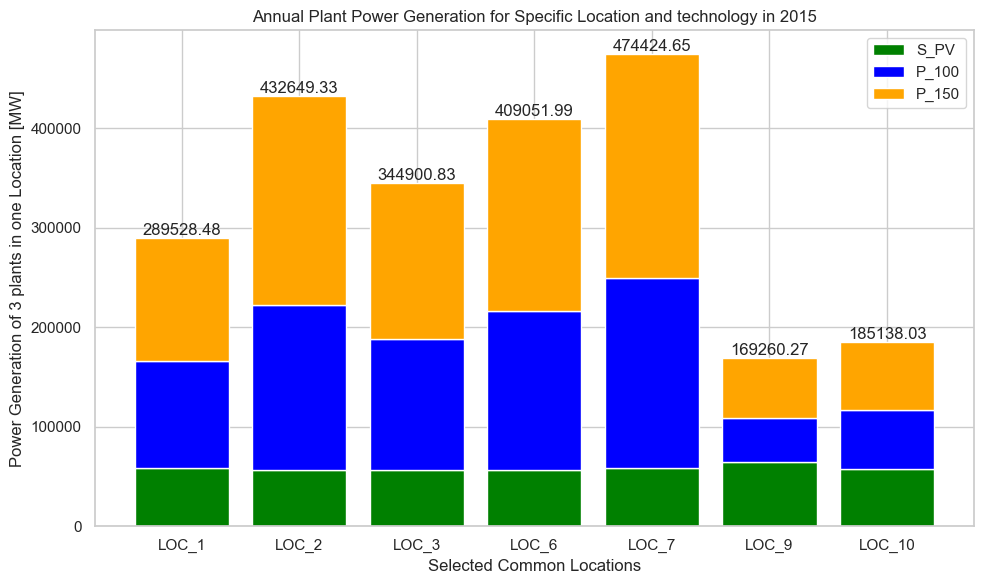

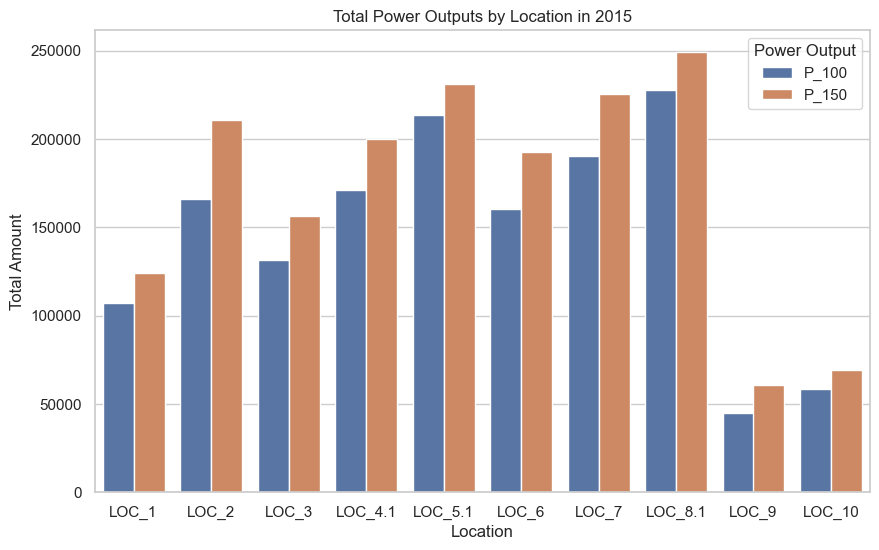

In [3]:

# Define the output_year function
def output_year(chosen_year):
    # Read the CSV files
    df_P_100 = pd.read_csv("P_w_100.csv")
    df_P_150 = pd.read_csv("P_w_150.csv")
    df_P_PV = pd.read_csv("P_PV_old.csv")

    # Convert 'time' column to datetime
    df_P_100['time'] = pd.to_datetime(df_P_100['time'], utc=True)
    df_P_150['time'] = pd.to_datetime(df_P_150['time'], utc=True)
    df_P_PV['time'] = pd.to_datetime(df_P_PV['time'], utc=True)

    # Filter data frames based on chosen year
    df_P_100_year = df_P_100[df_P_100['time'].dt.year == chosen_year]
    df_P_150_year = df_P_150[df_P_150['time'].dt.year == chosen_year]
    df_P_PV_year = df_P_PV[df_P_PV['time'].dt.year == chosen_year]

    # Extract the necessary columns for each data frame
    arr_w = ['time', 'LOC_1', 'LOC_2', 'LOC_3', 'LOC_4.1', 'LOC_5.1', 'LOC_6', 'LOC_7', 'LOC_8.1', 'LOC_9', 'LOC_10']
    arr_s = ['time', 'LOC_1', 'LOC_2', 'LOC_3', 'LOC_4.2', 'LOC_5.2', 'LOC_6', 'LOC_7', 'LOC_8.2', 'LOC_9', 'LOC_10']

    df_P_100_year = df_P_100_year[arr_w]
    df_P_150_year = df_P_150_year[arr_w]
    df_P_PV_year = df_P_PV_year[arr_s]

    # Calculate P_100 for each location
    P_100 = {}
    for loc in df_P_100_year.columns[1:]:
        P_100[loc] = df_P_100_year[loc] * 50

    # Calculate P_150 for each location
    P_150 = {}
    for loc in df_P_150_year.columns[1:]:
        P_150[loc] = df_P_150_year[loc] * 50

    # Calculate S_PV for each location
    S_PV = {}
    for loc in df_P_PV_year.columns[1:]:
        S_PV[loc] = df_P_PV_year[loc] * 50

    for loc in df_P_100_year.columns[1:]:
        print(f"P_100_{chosen_year}_{loc}: {P_100[loc].sum()}")

    for loc in df_P_150_year.columns[1:]:
        print(f"P_150_{chosen_year}_{loc}: {P_150[loc].sum()}")

    for loc in df_P_PV_year.columns[1:]:
        print(f"S_PV_{chosen_year}_{loc}: {S_PV[loc].sum()}")


    # Get the location names from the DataFrame column names
    location_names = df_P_100_year.columns[1:]
    # for solar technology
    loc_names = df_P_PV_year.columns[1:]

    # Combine the dictionaries into a single DataFrame for wind power
    data_w = pd.DataFrame({'Location': location_names,
                          'P_100': [P_100[loc].sum() for loc in location_names],
                          'P_150': [P_150[loc].sum() for loc in location_names]})

    # Combine the dictionaries into a single DataFrame for solar power
    data_s = pd.DataFrame({'Location': loc_names,
                          'S_PV': [S_PV[loc].sum() for loc in loc_names]})

    # Filter the data frames for specific locations
    locations_to_plot = ['LOC_1', 'LOC_2', 'LOC_3', 'LOC_6', 'LOC_7', 'LOC_9', 'LOC_10']
    filtered_data_w = data_w[data_w['Location'].isin(locations_to_plot)]
    filtered_data_solar = data_s[data_s['Location'].isin(locations_to_plot)]

    # Calculate the sum of values for each location
    sum_values = []
    for location in locations_to_plot:
        sum_value = (
            filtered_data_solar.loc[filtered_data_solar['Location'] == location, 'S_PV'].sum() +
            filtered_data_w.loc[filtered_data_w['Location'] == location, 'P_100'].sum() +
            filtered_data_w.loc[filtered_data_w['Location'] == location, 'P_150'].sum()
        )
        sum_values.append(sum_value)

    # Create a stacked bar plot
    sns.set(style='whitegrid')
    plt.figure(figsize=(10, 6))

    # Calculate the height of each bar (total sum of S_PV, P_100, and P_150)
    height_s_pv = [filtered_data_solar.loc[filtered_data_solar['Location'] == loc, 'S_PV'].sum() for loc in locations_to_plot]
    height_p100 = [filtered_data_w.loc[filtered_data_w['Location'] == loc, 'P_100'].sum() for loc in locations_to_plot]
    height_p150 = [filtered_data_w.loc[filtered_data_w['Location'] == loc, 'P_150'].sum() for loc in locations_to_plot]

    # Create the stacked bar plot
    bar_width = 0.35
    index = range(len(locations_to_plot))

    # Plot S_PV
    plt.bar(index, height_s_pv, label='S_PV', color='green')

    # Plot P_100 on top of S_PV
    plt.bar(index, height_p100, label='P_100', color='blue', bottom=height_s_pv)

    # Plot P_150 on top of S_PV and P_100
    plt.bar(index, height_p150, label='P_150', color='orange', bottom=[sum(x) for x in zip(height_s_pv, height_p100)])

    for i in index:
        total_value = height_s_pv[i] + height_p100[i] + height_p150[i]
        plt.text(i, total_value, f"{total_value:.2f}", ha='center', va='bottom')



    plt.xlabel('Selected Common Locations')
    plt.ylabel('Power Generation of 3 plants in one Location [MW]')
    plt.title(f'Annual Plant Power Generation for Specific Location and technology in {chosen_year}')

    plt.xticks(index, locations_to_plot)
    plt.legend()
    plt.tight_layout()
    plt.show()
    
    # Combine the dictionaries into a single DataFrame
    data = pd.DataFrame({'Location': location_names,
                        'P_100': [P_100[loc].sum() for loc in location_names],
                        'P_150': [P_150[loc].sum() for loc in location_names]})

    # Melt the DataFrame to transform it into long format
    data_melted = data.melt(id_vars='Location', var_name='Power Output', value_name='Total Amount')

    # Plot using Seaborn
    sns.set(style='whitegrid')
    plt.figure(figsize=(10, 6))
    sns.barplot(x='Location', y='Total Amount', hue='Power Output', data=data_melted)

    plt.xlabel('Location')
    plt.ylabel('Total Amount')
    plt.title(f'Total Power Outputs by Location in {chosen_year}')

    plt.legend(title='Power Output')
    plt.show()
    
       

# Call the output_year function with the chosen year
chosen_year = 2015
output_year(chosen_year)

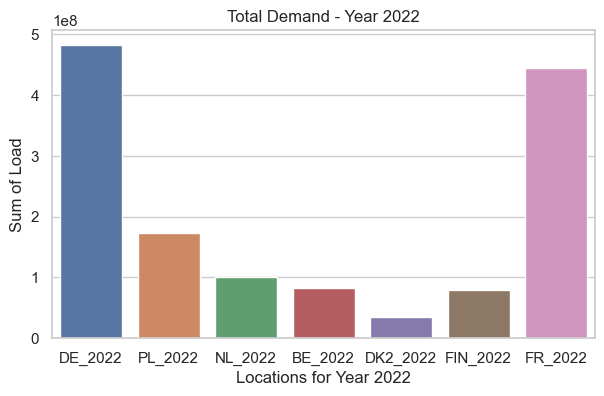

In [12]:

# TOTAL DEMAND FROM EACH COUNTRY IN SEL_YEAR
load_sum = {sheet_name: df["Load"].sum() for sheet_name, df in filtered_dict.items()}
sheet_names = list(load_sum.keys())
load_sums = list(load_sum.values())

sns.set(style="whitegrid")
plt.figure(figsize=(7, 4))
sns.barplot(x=sheet_names, y=load_sums)
plt.xlabel(f'Locations for Year {sel_year}')
plt.ylabel('Sum of Load')
plt.title(f'Total Demand - Year {sel_year}')
plt.show()

In [5]:
# Residual Demand is the Demand
df_load_DE_2017 = pd.read_excel("Demand_Renewable_Share_Loc_8.xlsx", sheet_name="DE_2017", usecols=["Date (GMT+1)", "Load"])
df_load_DE_2017["Date (GMT+1)"] = pd.to_datetime(df_load_DE_2017["Date (GMT+1)"])
# convert from GMT+1 to UTC by subtracting one hour
df_load_DE_2017["Date (UTC)"] = df_load_DE_2017["Date (GMT+1)"] - pd.Timedelta(hours=1)
df_load_DE_2017.drop("Date (GMT+1)", axis=1, inplace=True)
load_DE_2017=df_load_DE_2017["Load"].drop(0)
avg_load_DE_2017= np.mean(load_DE_2017)
avg_load_DE_2017
norm_load_DE_2017=load_DE_2017/avg_load_DE_2017
list1= norm_load_DE_2017.tolist()
arr1 = np.array(list1)
# norm_VRE_sum
# arr_VRE.tolist()
# load_DE_2017.drop("Date (UTC)").tolist()
# list2= norm_VRE_sum.tolist()
list2=VRE_sum_de_norm.tolist()
arr2 = np.array(list2)
norm_Res_Load_VRE= arr1 - arr2

norm_Res_Load_VRE

# with real data
VRE_sum_de_norm = normalized_vre(VRE_sum_de)
x= norm_Res_Load_VRE.tolist()
# y= norm_SP.tolist()

# calculate correlation coefficient
corr_coef = np.corrcoef(x, y)[0][1]

# display correlation coefficient
print("Correlation coefficient:", corr_coef)

correlation_matrix = np.corrcoef(x, y)
correlation_xy = correlation_matrix[0,1]
plt.title('Residual Load vs Spot Prices in Germany in 2017')
plt.xlabel('Normalized Residual Load (non-VRE)')
plt.ylabel('Normalized Actual Spot Price')
plt.scatter(x, y,s=1)
plt.plot(np.unique(x), np.poly1d(np.polyfit(x, y, 1))(np.unique(x)), color='green')
plt.grid(True)
plt.show()

# Fit a first-degree polynomial to the data
fit = np.polyfit(x, y, 1)

# Print the coefficients of the polynomial
print("Slope:", fit[0])
print("Intercept:", fit[1])



FileNotFoundError: [Errno 2] No such file or directory: 'Demand_Renewable_Share_Loc_8.xlsx'

In [9]:
# Specify the file path
excel_file = r'C:\Users\ngt13\Desktop\Thesis_main_folder\BASE_CASE\Demand_Renewable_Share_Loc_6.xlsx'

# Create an empty DataFrame to store the extracted data
df_extracted = pd.DataFrame()

# Read each sheet of the Excel file
excel_data = pd.read_excel(excel_file, sheet_name=None)

# Iterate over each sheet
for sheet_name, df_sheet in excel_data.items():
    # Extract the desired columns from the sheet
    if 'Day Ahead Auction' in df_sheet.columns and 'Date (GMT+1)' in df_sheet.columns and 'Load' in df_sheet.columns:
        df_temp = df_sheet[['Day Ahead Auction', 'Date (GMT+1)', 'Load']]
        # Append the extracted data to the main DataFrame
        df_extracted = df_extracted.append(df_temp, ignore_index=True)


C:\Users\ngt13\AppData\Local\Temp\ipykernel_11464\1285420804.py:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_extracted = df_extracted.append(df_temp, ignore_index=True)
C:\Users\ngt13\AppData\Local\Temp\ipykernel_11464\1285420804.py:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_extracted = df_extracted.append(df_temp, ignore_index=True)
C:\Users\ngt13\AppData\Local\Temp\ipykernel_11464\1285420804.py:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_extracted = df_extracted.append(df_temp, ignore_index=True)
C:\Users\ngt13\AppData\Local\Temp\ipykernel_11464\1285420804.py:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
 

VRE PRODUCTION

In [3]:
country_VRE = ['Germany','Belgium', 'Netherlands', 'Poland', 'Denmark', 'Finland', 'France']

solar_columns = [f'{country}_SWGDN_no_pop_weights_1979_2020_hourly.dat' for country in country_VRE]
solar_columns.insert(0, "time")  # Insert "time" column at the beginning

wind_columns = [f'ERA5_native_grid_{country}_whh_weighted_1979_2019_v16_hourly.dat' for country in country_VRE]
wind_columns.insert(0, "time")  # Insert "time" column at the beginning

df_solar = pd.read_csv("ERA5_SWGDN_all_countries_1979_2019_hourly.csv", usecols=solar_columns)
df_wind = pd.read_csv("ERA5_whh_all_countries_1979_2019_inclusive_hourly.csv", usecols=wind_columns)

df_solar["time"] = pd.to_datetime(df_solar["time"], format='%Y-%m-%d %H:%M:%S')
df_wind["time"] = pd.to_datetime(df_wind["time"], format='%Y-%m-%d %H:%M:%S')
sel_year = 2017

def filter_year_vre(df, year, country):
    start_date = pd.to_datetime(f'{year}-01-01')
    end_date = pd.to_datetime(f'{year}-12-31')
    filtered_df = df.loc[(df['time'] >= start_date) & (df['time'] <= end_date)]
    return filtered_df

filtered_dfs_solar = []
filtered_dfs_wind = []

for country in country_VRE:
    filtered_df_solar = filter_year_vre(df_solar, sel_year, f"{country}_SWGDN_no_pop_weights_1979_2020_hourly.dat")
    filtered_df_wind = filter_year_vre(df_wind, sel_year, f"ERA5_native_grid_{country}_whh_weighted_1979_2019_v16_hourly.dat")
    
    filtered_df_solar.rename(columns={f"{country}_SWGDN_no_pop_weights_1979_2020_hourly.dat": country}, inplace=True)
    filtered_df_wind.rename(columns={f"ERA5_native_grid_{country}_whh_weighted_1979_2019_v16_hourly.dat": country}, inplace=True)
    
    filtered_dfs_solar.append(filtered_df_solar)
    filtered_dfs_wind.append(filtered_df_wind)

if all(df.empty for df in filtered_dfs_solar) or all(df.empty for df in filtered_dfs_wind):
    print("No data available for the selected year.")
else:
    print("Dataframes successfully filtered.")

# # Plotting the filtered solar data
# plt.figure(figsize=(12, 6))
# for country, df_solar in zip(country_VRE, filtered_dfs_solar):
#     plt.plot(df_solar["time"], df_solar[country], label=country)

# plt.xlabel('Time')
# plt.ylabel('SWGDN')
# plt.title(f'SWGDN for Different Countries - {sel_year}')
# plt.legend()
# plt.show()

# # Plotting the filtered wind data
# plt.figure(figsize=(12, 6))
# for country, df_wind in zip(country_VRE, filtered_dfs_wind):
#     plt.plot(df_wind["time"], df_wind[country], label=country)

# plt.xlabel('Time')
# plt.ylabel('Wind')
# plt.title(f'Wind for Different Countries - {sel_year}')
# plt.legend()
# plt.show()

# # VRE total production
# df_VRE = pd.merge(filtered_dfs_solar[0], filtered_dfs_wind[0], on="time")
# plt.figure(figsize=(12, 6))
# for country in country_VRE:
#     plt.plot(df_VRE["time"], df_VRE[country], label=country)

# plt.xlabel('Time')
# plt.ylabel('Combined VRE')
# plt.title(f'Combined VRE for Different Countries - {sel_year}')
# plt.legend()
# plt.show()


Dataframes successfully filtered.


C:\Users\ngt13\AppData\Local\Temp\ipykernel_4896\2611768620.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df_solar.rename(columns={f"{country}_SWGDN_no_pop_weights_1979_2020_hourly.dat": country}, inplace=True)
C:\Users\ngt13\AppData\Local\Temp\ipykernel_4896\2611768620.py:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df_wind.rename(columns={f"ERA5_native_grid_{country}_whh_weighted_1979_2019_v16_hourly.dat": country}, inplace=True)
C:\Users\ngt13\AppData\Local\Temp\ipykernel_4896\2611768620.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

S